# Modelling
## Determinants of household dietary diversity (HDDS) in 5 northern state of nigeria

<br>

## Definition of variables and working hypotheses


The dietary diversity tool has been proposed and used by FAO to
measure and assess food groups consumed during a defined reference
period and universally

### Methods of data analysis
Frequency distribution, mean, percentage distribution and
standard deviations were employed. `Chi-square` analysis was
employed for comparing groups such as sex of household head, 
marital status, education, agricultural activities,
shocks(selected shocks), difficulties(selected difficulties),
and one-way ANOVA for comparing groups like household size, 
and land-holding size.

**Independent Variables**

* HH Gender
* HH Education
* Marital Status
* Agricultural Activity
* Shocks
* household size
* landsize

**One-way ANOVA**
The one-way ANOVA test showed
significant difference between `HDD` categories in terms of household size, income and land holding size.

[Ordinal logistic regression](https://cscu.cornell.edu/wp-content/uploads/91_ordlogistic.pdf) model was
used to determine the relationship between the dependent variables and a set of explanatory variables

**TABLES**
* Comparison of household dietary diversity categories (continuous explanatory variables) `|Low (N %) |Medium (N % ) |High (N %) |Total (N %)`
* Comparison of household dietary diversity categories (dummy explanatory variables `|Low (N %) |Medium (N % ) |High (N %) |Total (N %)`
* Distribution of respondents by level of household dietary diversity `HDDS| Frequency| % | Range |Mean |SD | Max | Min`
*  Food groups of households Food Groups `|Low (N %) |Medium (N % ) |High (N %) |Total (N %)`

* Parameter estimates of ordinal logistic regression`|Variables| Estimate |Standard error |Wald |P-value |Odds ratio`


## Prevalence and predictors of food insecurity among household in 5 northern states in Nigeria

**Different Model to try**

* logistic regression,
* probit regression, or Tobit regression with raw score as dependent variable.
* linear probability (OLS with a 0/1 dependent variable)
* Three level linear model

## Import Libraries and Data

In [36]:
## Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import statsmodels as sm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_row', 500)

In [37]:
# Import the data into a DataFrame

df_original = pd.read_csv("../../data/DIEM_NG/diem_hdds_round_4.csv")

**Design matrices (endog & exog)**

To fit most of the models covered in `statsmodel`, you will need to create two design matrices.
- The first is a matrix of endogenous variable(s) (i.e. dependent, response, regressand, etc.).
- The second is a matrix of exogenous variable(s) (i.e. independent, predictor, regressor, etc.).


## Data exploration, data cleaning and model preparation

**Dependent Variable**

Household Dietary Diversity (`HDD`) Status 

Households are classified as having **low dietary diversity** if they consume less than **3 food groups**, 
**medium dietary diversity** if they consume **3 or 4 food groups** and 
**high dietary diversity** if they consume **5 or more food groups**.


* Low HDDS = 0 (if the dietary diversity score of households is less than four)
* Medium HDDS = 1 (if four to six)
* High HDDS = 2 (if more than six).

### Explore the data

Check the data type of each column. Note that logistic regression models expect numeric data. 

### Dependent Variable `HDDS`

In [38]:
df_original.head()

,country,state,local_govt_area,hh_agricactivity,hh_gender,hh_education,hh_size,hh_age,resp_islsproducer,resp_iscropproducer,resp_isfishproducer,weight_final,hh_wealth_toilet,income_main,income_main_amount,income_sec_amount,income_main_comp,fcg,income_sec,income_third,tot_income,shock_noshock,shock_sicknessordeathofhh,shock_lostemplorwork,shock_otherintrahhshock,shock_higherfoodprices,shock_higherfuelprices,shock_mvtrestrict,shock_othereconomicshock,shock_pestoutbreak,shock_plantdisease,shock_animaldisease,shock_napasture,shock_othercropandlivests,shock_coldtemporhail,shock_flood,shock_hurricane,shock_drought,shock_earthquake,shock_landslides,shock_firenatural,shock_othernathazard,shock_violenceinsecconf,shock_theftofprodassets,shock_firemanmade,shock_othermanmadehazard,crp_landsize_ha,crp_main,crp_seed_ownprod,crp_seed_market,crp_seed_company,crp_seed_ngo,crp_seed_organized_community,crp_seed_gov,crp_seed_relatives_friends,crp_seed_other,crp_area_change,crp_harv_change,crp_harv_lastyr_kg,crp_proddif,crp_proddif_plant_disease,crp_proddif_pest_outbreak,crp_proddif_animal_grazing,crp_proddif_access_plot,crp_proddif_access_fertilize,crp_proddif_seed_quality,crp_proddif_seed_quantity,crp_proddif_access_pesticide,crp_proddif_access_labour,crp_proddif_access_machinery,crp_proddif_access_fuel,crp_proddif_soil_erosion,crp_proddif_lack_irrigation,crp_proddif_excess_water,crp_proddif_access_credit,crp_proddif_other,crp_storage,crp_salesmain,crp_salesdif,crp_saledif_marketing_cost,crp_saledif_damage_losses,crp_saledif_low_demand,crp_saledif_pay_delay,crp_saledif_low_price,crp_saledif_processing,crp_saledif_competition,crp_saledif_other,crp_salesprice,ls_main,ls_num_lastyr,ls_num_now,ls_num_diff,ls_num_increased,ls_num_decreased,ls_num_no_change,ls_num_inc_less_sales,ls_num_inc_more_birth,ls_num_inc_more_acquired,ls_num_inc_received_free,ls_num_dec_poor_health,ls_num_dec_death,ls_num_dec_sales_good_price,ls_num_dec_sales_distress,ls_num_dec_escape_stolen,ls_num_dec_consumed,ls_num_inc_dec_other,ls_feed_open_pasture,ls_feed_common_pasture,ls_feed_self_produced,ls_feed_purchased,ls_feed_free_dist,ls_feed_other,ls_proddif,ls_proddif_feed_purchase,ls_proddif_access_pasture,ls_proddif_access_water,ls_proddif_vet_serv,ls_proddif_vet_input,ls_proddif_diseases,ls_proddif_theft,ls_proddif_access_market,ls_proddif_access_credit,ls_proddif_access_labour,ls_proddif_other,ls_salesmain,ls_salesdif,ls_salesdif_marketing_cost,ls_salesdif_damage_losses,ls_salesdif_low_demand,ls_salesdif_pay_delay,ls_salesdif_low_price,ls_salesdif_slaughterhouse,ls_salesdif_processing,ls_salesdif_competition,ls_salesdif_other,ls_salesprice,fish_proddif,fish_salesdif,need,need_food,need_cash,need_vouchers_fair,need_crop_inputs,need_crop_infrastructure,need_crop_knowledge,need_ls_feed,need_ls_vet_service,need_ls_infrastructure,need_ls_knowledge,need_fish_inputs,need_fish_infrastructure,need_fish_knowledge,need_env_infra_rehab,need_cold_storage,need_marketing_supp,need_other,need_received_food,need_received_cash,need_received_vouchers_fair,need_received_crop_assist,need_received_ls_assist,need_received_fish_assist,need_received_rehabilitation,need_received_sales_support,need_received_other,need_received_none,fies_worried,fies_healthy,fies_fewfoods,fies_skipped,fies_ateless,fies_ranout,fies_hungry,fies_whlday,p_mod,p_sev,cs_hh_assets,cs_spent_savings,cs_borrowed_money,cs_sold_prod_assets,cs_no_school,cs_reduced_health_exp,cs_harv_immature_crops,cs_sold_house,cs_begged,cs_illegal,cs_sold_last_female,rcsi_less_preferred_foods,rcsi_borrowed_food,rcsi_reduce_number_meals,rcsi_limit_portions,rcsi_restrict_adult_consumpt,rcsi_score,rcsi_class,hdds_cereals,hdds_rootstubers,hdds_vegetables,hdds_fruits,hdds_meat,hdds_eggs,hdds_fish,hdds_legumes,hdds_milkdairy,hdds_oils,hdds_sugar,hdds_condiments,hdds_score,hdds_class,fcs_staple_days,fcs_pulses_days,fcs_vegetables_days,fcs_fruit_days,fcs_meat_fish_days,fcs_dairy_days,fcs_sugar_days,fcs_oil_days,fcs_condiments_days,income_main_cat,fiesraw

In [39]:
# Rename the vales of the from dummy to string
col_dict = {1 : "Low",
           2: "Medium",
           3: "High"}

df_original["hdds_class"] = df_original.hdds_class.astype("category").cat.rename_categories(col_dict)

In [40]:
# Create the dependent variables using the FAO suggestions


# Severely FI vs Others
df_original.loc[:, "FI_0_6"] = np.where(df_original["fiesrawscore"] > 6, 1, 0)

In [41]:

# Create categorical variable with specified bins
bins = [-float('inf'), 0, 6, float('inf')]
labels = ['Secure', 'mild to moderate', 'Severe']

df_original['fies_cat'] = pd.cut(df_original['fiesrawscore'], bins=bins, labels=labels)

df_original[["fiesrawscore", "fies_cat"]]

,fiesrawscore,fies_cat
0,0.0,Secure
1,1.0,mild to moderate
2,3.0,mild to moderate
3,0.0,Secure
4,4.0,mild to moderate
...,...,...
1409,2.0,mild to moderate
1410,5.0,mild to moderate
1411,2.0,mild to moderate
1412,6.0,mild to moderate


### Predictor Variables:

Subset the columns of interest

In [42]:
#### Subset the columns of interest for modelling
col_of_interest = [
    "state",
    "hh_agricactivity",
    "hh_gender",
    "hh_education",
    "hh_size",
    "tot_income",
    "income_main_amount",
    "income_sec_amount",
    "hh_age",
    "crp_landsize_ha",

    "shock_climate",
    "shock_drought",
    "shock_flood",
    "shock_plantdisease",
    "shock_pestoutbreak",
    "shock_animaldisease",
    "shock_violenceinsecconf",
    "shock_higherfoodprices",
    "shock_higherfuelprices",
    "hdds_cereals",
    "hdds_rootstubers",
    "hdds_vegetables",
    "hdds_fruits",
    "hdds_meat",
    "hdds_eggs",
    "hdds_fish",
    "hdds_legumes",
    "hdds_milkdairy",
    "hdds_oils",
    "hdds_sugar",
    "hdds_condiments",
    "hdds_score",
    "hdds_class",
    "fcs_staple_days",
    "fcs_pulses_days",
    "fcs_vegetables_days",
    "fcs_fruit_days",
    "fcs_meat_fish_days",
    "fcs_dairy_days",
    "fcs_sugar_days",
    "fcs_oil_days",
    "fcs_condiments_days",
    "fcg",
    "FI_0_6",
    "fies_cat",
    "weight_final",
    # "hh_maritalstat_clean",
    # "resp_islsproducer",
    # "resp_iscropproducer",
    # "crp_main",
    # "crp_salesprice",
    # "wealth_quintile",
    # "hh_wealth_water",
    # "hh_wealth_toilet",
    # "hh_wealth_light",
    # "income_comp_clean",
    # "income_more_than_one",
    # "income_main_cat",
    # "income_main_gender",
    # "income_main_control",
    # "need",
    # "any_salediff",
    # "any_proddiff",
    # "any_dif",
    # "crp_proddif_access_fertilize",
    # "FI_0",
    # "FI_0_3",
    # "FI_0_6",

]


In [43]:
df_original.filter(like="fcs").columns


Index(['fcs_staple_days', 'fcs_pulses_days', 'fcs_vegetables_days',
       'fcs_fruit_days', 'fcs_meat_fish_days', 'fcs_dairy_days',
       'fcs_sugar_days', 'fcs_oil_days', 'fcs_condiments_days'],
      dtype='object')

In [44]:
# Subset the selected columns
hdds_df = df_original[col_of_interest]

### Check for missing data

In [45]:
hdds_df.isna().sum()

state                        0
hh_agricactivity             0
hh_gender                    0
hh_education                 0
hh_size                      0
tot_income                  12
income_main_amount           1
income_sec_amount          945
hh_age                       0
crp_landsize_ha              0
shock_climate                0
shock_drought                0
shock_flood                  0
shock_plantdisease           0
shock_pestoutbreak           0
shock_animaldisease          0
shock_violenceinsecconf      0
shock_higherfoodprices       0
shock_higherfuelprices       0
hdds_cereals                 0
hdds_rootstubers             0
hdds_vegetables              0
hdds_fruits                  0
hdds_meat                    0
hdds_eggs                    0
hdds_fish                    0
hdds_legumes                 0
hdds_milkdairy               0
hdds_oils                    0
hdds_sugar                   0
hdds_condiments              0
hdds_score                   0
hdds_cla

**Observation**

`tot_income` contain 12 missing values and `income_sec_amount` contains 945 missing values

**Impact**

Explore the missing record. Possible imputation can be done.

In [46]:
# Check the missing records
hdds_df[hdds_df.tot_income.isna()].head()


,state,hh_agricactivity,hh_gender,hh_education,hh_size,tot_income,income_main_amount,income_sec_amount,hh_age,crp_landsize_ha,shock_climate,shock_drought,shock_flood,shock_plantdisease,shock_pestoutbreak,shock_animaldisease,shock_violenceinsecconf,shock_higherfoodprices,shock_higherfuelprices,hdds_cereals,hdds_rootstubers,hdds_vegetables,hdds_fruits,hdds_meat,hdds_eggs,hdds_fish,hdds_legumes,hdds_milkdairy,hdds_oils,hdds_sugar,hdds_condiments,hdds_score,hdds_class,fcs_staple_days,fcs_pulses_days,fcs_vegetables_days,fcs_fruit_days,fcs_meat_fish_days,fcs_dairy_days,fcs_sugar_days,fcs_oil_days,fcs_condiments_days,fcg,FI_0_6,fies_cat,weight_final
210,Adamawa,crop production,Male,Higher Education,8.0,NaN,630000.0,511000.0,41 to 65,0.809389,True,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,High,7.0,7.0,7.0,2.0,7.0,4.0,4.0,7.0,7.0,3.0,0,Secure,0.845520
368,Yobe,crop production,Male,Secondary Education,8.0,NaN,3000000.0,NaN,18 to 40,7.000000,False,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,5.0,High,4.0,1.0,7.0,0.0,2.0,0.0,3.0,7.0,7.0,2.0,1,Severe,0.771834
552,Borno,No,Male,Higher Education,5.0,NaN,1350000.0,NaN,41 to 65,0.000000,False,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,High,5.0,2.0,4.0,1.0,6.0,2.0,3.0,7.0,7.0,3.0,0,mild to moderate,1.162478
760,Zamfara,crop production,Male,Higher Education,6.0,NaN,950000.0,450000.0,41 to 65,3.000000,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,9.0,High,7.0,4.0,7.0,5.0,7.0,6.0,6.0,7.0,7.0,3.0,0,Secure,0.802971
793,Katsina,crop and livestock production,Male,Higher Education,8.0,NaN,700000.0,500000.0,18 to 40,2.000000,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,Medium,5.0,3.0,7.0,0.0,2.0,2.0,4.0,6.0,6.0,3.0,0,Secure,1.792892


In [47]:
# Fill NaN in income_sec_amount with zero
# Fill NaN in tot_income with the sum of income_sec_amount and income_main_amount
# drop income_sec_amount and income_main_amount

# Step 1: Fill NaN in income_sec_amount with zero
hdds_df['income_sec_amount'] = hdds_df['income_sec_amount'].fillna(0)

# Step 2: Fill NaN in tot_income with the sum of income_sec_amount and income_main_amount
hdds_df['tot_income'] = hdds_df['tot_income'].fillna(hdds_df['income_sec_amount'] + hdds_df['income_main_amount'])

# Step 3: Drop income_sec_amount and income_main_amount
hdds_df.drop(columns=['income_sec_amount', 'income_main_amount'], inplace=True)


/var/folders/v2/zgr5gbws4qd_qpb553947v7h0000gn/T/ipykernel_82904/3436476513.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdds_df['income_sec_amount'] = hdds_df['income_sec_amount'].fillna(0)
/var/folders/v2/zgr5gbws4qd_qpb553947v7h0000gn/T/ipykernel_82904/3436476513.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdds_df['tot_income'] = hdds_df['tot_income'].fillna(hdds_df['income_sec_amount'] + hdds_df['income_main_amount'])
/var/folders/v2/zgr5gbws4qd_qpb553947v7h0000gn/T/ipykernel_82904/343647

### Outlier Analysis

In [48]:
hdds_df["crp_landsize_ha"].describe()

count      1414.000000
mean        254.339749
std        8006.537465
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max      300000.000000
Name: crp_landsize_ha, dtype: float64

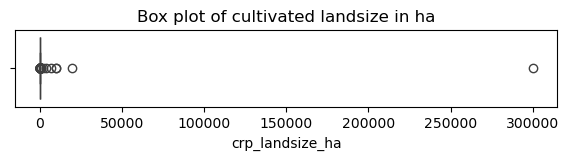

In [49]:
# Check for outlier
# Create a boxplot to visualize distribution of `crp_landsize_ha`

plt.figure(figsize=(7,1))
sns.boxplot(hdds_df["crp_landsize_ha"], orient="h");
plt.title("Box plot of cultivated landsize in ha");

In [50]:
Q1 = hdds_df["crp_landsize_ha"].quantile(0.25)
Q3 = hdds_df["crp_landsize_ha"].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outlier
outliers = hdds_df[(hdds_df['crp_landsize_ha'] < lower_bound) | (hdds_df['crp_landsize_ha'] > upper_bound)]

hdds_df_no_outlier = hdds_df[(hdds_df['crp_landsize_ha'] >= lower_bound) & (hdds_df['crp_landsize_ha'] <= upper_bound)]


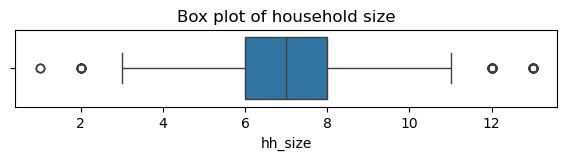

In [51]:
# Create a boxplot to visualize distribution of `hh_size`

plt.figure(figsize=(7,1))
sns.boxplot(hdds_df_no_outlier["hh_size"], orient="h");
plt.title("Box plot of household size");

<Axes: xlabel='tot_income'>

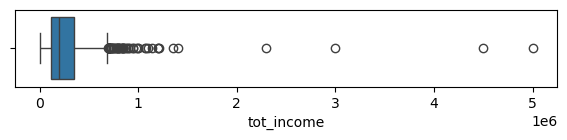

In [52]:
# Income
plt.figure(figsize=(7,1))
sns.boxplot(hdds_df_no_outlier["tot_income"], orient="h")

In [53]:
Q1 = hdds_df["tot_income"].quantile(0.25)
Q3 = hdds_df["tot_income"].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outlier
outliers = hdds_df[(hdds_df['tot_income'] < lower_bound) | (hdds_df['tot_income'] > upper_bound)]

hdds_df_no_outlier = hdds_df[(hdds_df['tot_income'] >= lower_bound) & (hdds_df['tot_income'] <= upper_bound)]


<Axes: xlabel='tot_income'>

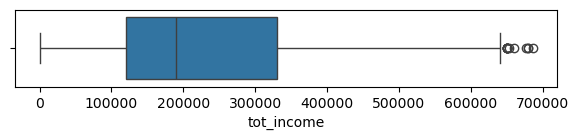

In [54]:
plt.figure(figsize=(7,1))
sns.boxplot(hdds_df_no_outlier["tot_income"], orient="h")

In [55]:
# Convert Naira to dollar (460.51 )
hdds_df_no_outlier.loc[:, "tot_income_dollar"] = hdds_df_no_outlier["tot_income"].div(460.51) 

/var/folders/v2/zgr5gbws4qd_qpb553947v7h0000gn/T/ipykernel_82904/1944464404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdds_df_no_outlier.loc[:, "tot_income_dollar"] = hdds_df_no_outlier["tot_income"].div(460.51)


### Data Preparation

In [56]:
# df.info()

In [57]:
hdds_df_no_outlier.shape

(1348, 45)

 Check the balance of the dependent variable

In [58]:
hdds_df_no_outlier["hdds_class"].value_counts(normalize=True)

hdds_class
High      0.729228
Medium    0.210682
Low       0.060089
Name: proportion, dtype: float64

Quick inspection of the some of the new variables

## Model Building

In [59]:

hdds_df_no_outlier.to_csv("../../data/DIEM_NG/hdds_round4_data.csv", index=False)

In [60]:
hdds_df_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1348 entries, 0 to 1413
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   state                    1348 non-null   object  
 1   hh_agricactivity         1348 non-null   object  
 2   hh_gender                1348 non-null   object  
 3   hh_education             1348 non-null   object  
 4   hh_size                  1348 non-null   float64 
 5   tot_income               1348 non-null   float64 
 6   hh_age                   1348 non-null   object  
 7   crp_landsize_ha          1348 non-null   float64 
 8   shock_climate            1348 non-null   bool    
 9   shock_drought            1348 non-null   float64 
 10  shock_flood              1348 non-null   float64 
 11  shock_plantdisease       1348 non-null   float64 
 12  shock_pestoutbreak       1348 non-null   float64 
 13  shock_animaldisease      1348 non-null   float64 
 14  shock_violenc